In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns
import string
#from wordcloud import WordCloud

% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
df_dep = pd.read_csv('Detecting-Depression-in-Tweets-master/depressed_tweets.csv')

FileNotFoundError: [Errno 2] File b'Detecting-Depression-in-Tweets-master/depressed_tweets.csv' does not exist: b'Detecting-Depression-in-Tweets-master/depressed_tweets.csv'

In [4]:
df_dep.head()

NameError: name 'df_dep' is not defined

In [ ]:
df_dep.drop([905,906,907,908,909,910,911], axis='rows',inplace=True)

In [ ]:
df_dep

In [ ]:
#remove duplicates

In [ ]:
df_dep['Unnamed: 0'] = 1
df_dep.columns=['0','tweet']
df_dep

In [ ]:
df_pos_pre = pd.read_csv('Detecting-Depression-in-Tweets-master/training.1600000.processed.noemoticon.csv',encoding = "ISO-8859-1",header=None)

In [ ]:
df_pos_pre_2 = pd.DataFrame((df_pos_pre[df_pos_pre[0]==4][[0,5]]).sample(n=2000,random_state=101))

In [ ]:
df_pos_pre_2.columns=['0','tweet']

In [ ]:
df_pos_pre_2['0'] = 0
df_pos_pre_2.to_csv("norm.csv")

In [ ]:
df_pos_pre_2 = pd.read_csv('norm.csv')

In [ ]:
df_pos_pre_2= df_pos_pre_2[['0','tweet']]

In [ ]:
df_pos_pre_2

In [ ]:
df_tweets = pd.concat([df_pos_pre_2, df_dep], ignore_index=True)

In [ ]:
df_tweets.info()

In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)   
    return input_txt    

In [ ]:
df_tweets['tidy_tweet'] = np.vectorize(remove_pattern)(df_tweets['tweet'], "@[\w]*")
df_tweets['tidy_tweet'] = np.vectorize(remove_pattern)(df_tweets['tidy_tweet'], "#[\w]*")
df_tweets['tidy_tweet'] = df_tweets['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [ ]:
df_tweets

In [ ]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
df_tweets['tidy_tweet'] = df_tweets['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if w not in stopWords]))

In [ ]:
df_tweets['tidy_tweet'] = df_tweets['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
df_tweets['tidy_tweet'] = df_tweets.tidy_tweet.map(lambda x: x.lower())

In [ ]:
df_tweets

In [ ]:
"""tokenized_tweet = df_tweets['tidy_tweet'].apply(lambda x: x.split())




        
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

df_tweets['tidy_tweet'] = tokenized_tweet"""

In [ ]:
df_tweets['message'] = df_tweets['tidy_tweet'].apply(nltk.word_tokenize)

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
 
df_tweets['message'] = df_tweets['message'].apply(lambda x: [stemmer.stem(y) for y in x])


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# This converts the list of words into space-separated strings
df_tweets['message'] = df_tweets['message'].apply(lambda x: ' '.join(x))

count_vect = CountVectorizer()
counts = count_vect.fit_transform(df_tweets['message'])


In [ ]:
df_tweets.head()

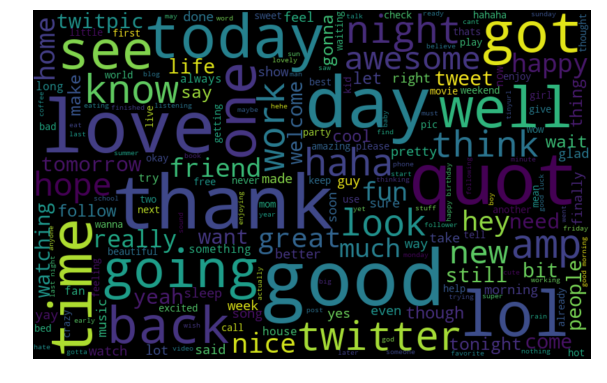

In [66]:
normal_words =' '.join([text for text in df_tweets['tidy_tweet'][df_tweets['0'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

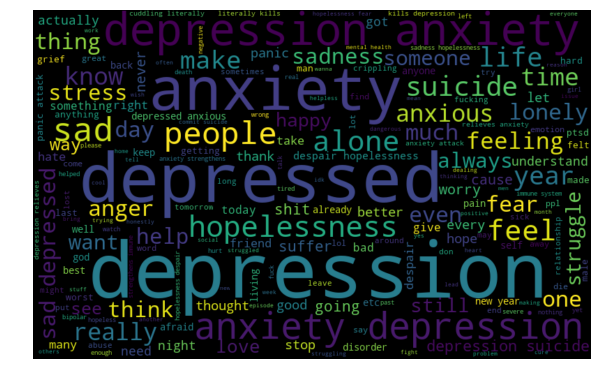

In [67]:
normal_words =' '.join([text for text in df_tweets['tidy_tweet'][df_tweets['0'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

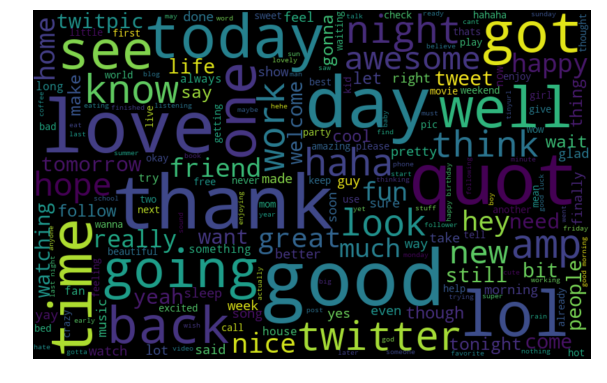

In [41]:
normal_words =' '.join([text for text in df_tweets['tidy_tweet'][df_tweets['0'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

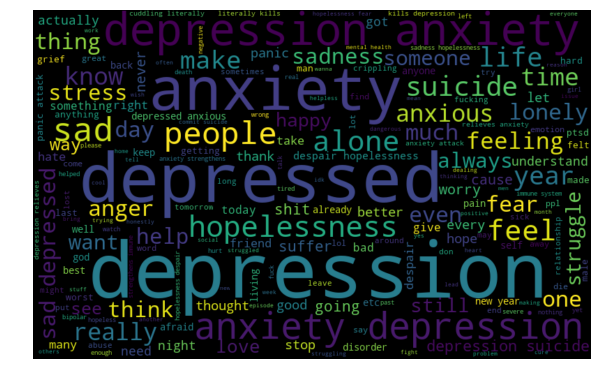

In [42]:
normal_words =' '.join([text for text in df_tweets['tidy_tweet'][df_tweets['0'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, df_tweets['0'], test_size=0.1, random_state=69)

In [69]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

In [70]:
import numpy as np

predicted = model.predict(X_test)

print(np.mean(predicted == y_test))

0.958904109589041


In [71]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predicted))

[[193  12]
 [  0  87]]


In [72]:
import numpy as np

predicted_train = model.predict(X_train)

print(np.mean(predicted_train == y_train))

0.9855127716355319


In [73]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, predicted_train))

[[1763   32]
 [   6  822]]


In [74]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

print(np.mean(pred_rfc == y_test))
#from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, pred_rfc))

1.0
[[205   0]
 [  0  87]]


In [39]:
pred_rfc_train = rfc.predict(X_train)

print(np.mean(pred_rfc_train == y_train))
#from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, pred_rfc_train))

0.9992375142966069
[[1795    0]
 [   2  826]]


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred_knn  = knn.predict(X_test)
print(np.mean(pred_knn==y_test))
print(confusion_matrix(y_test,pred_knn))

0.9143835616438356
[[204   1]
 [ 24  63]]


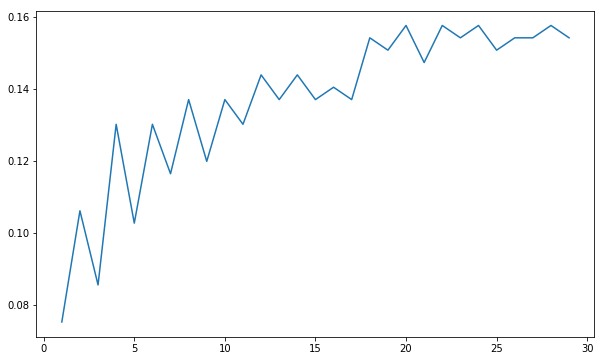

In [35]:
error_rate = []
for i in range (1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_knn  = knn.predict(X_test)
    error_rate.append(np.mean(pred_knn!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate)

In [36]:
from sklearn.svm import SVC
model = SVC(gamma = 0.1)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(np.mean(pred==y_test))

0.9965753424657534


In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))

[[205   0]
 [  1  86]]
